# How has food production evolved since 1961?

### About the data

The Food and Agriculture Organization (FAO) is a specialised agency of the United Nations that leads international efforts to defeat hunger. Food Balance Sheet presents a comprehensive picture of the pattern of a country's food supply during a specified reference period.

The food balance sheet used in this exercice covers 245 countries and territories, from 1961 to 2013. It is focused on two utilisations of each food item available:

- Food - refers to the total amount of the food item available as human food.
- Feed - refers to the quantity of the food item available for feeding to the livestock and poultry.

### Preparing the data for analysis

In [1]:
# importing the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# loading data and looking at its shape, columns
original_df = pd.read_csv("FAO.csv", encoding="latin1")
original_df.shape

(21477, 63)

In [2]:
original_df.columns

Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')

In [5]:
# a few adjustments to the column names for easier future manipulation
new_col_names = []
for column in original_df.columns:
    column = column.replace("Y", "")
    column = column.replace(" ", "_")
    column = column.lower()
    new_col_names.append(column)
original_df.columns = new_col_names
original_df.columns

Index(['area_abbreviation', 'area_code', 'area', 'item_code', 'item',
       'element_code', 'element', 'unit', 'latitude', 'longitude', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [6]:
# melting the data to turn it into a long format
# getting rid of the 'code' columns
melted_df = pd.melt(original_df,
                           id_vars=['area', 'item', 'element'], 
                           value_vars=['1961','1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970','1971', '1972', '1973', '1974', '1975', 
                                       '1976', '1977', '1978', '1979','1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988','1989', '1990', 
                                       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', 
                                       '2006','2007', '2008', '2009', '2010', '2011', '2012', '2013'],
                           var_name="year", value_name="production"
                            )
melted_df.shape

(1138281, 5)

In [8]:
print(melted_df.head(3))

          area                      item element  year  production
0  Afghanistan        Wheat and products    Food  1961      1928.0
1  Afghanistan  Rice (Milled Equivalent)    Food  1961       183.0
2  Afghanistan       Barley and products    Feed  1961        76.0


In [9]:
melted_df.dtypes

area           object
item           object
element        object
year           object
production    float64
dtype: object

### How has the world food production evolved in the past 50 years?

Let's look at how the total production of food items changed over the given period of time.

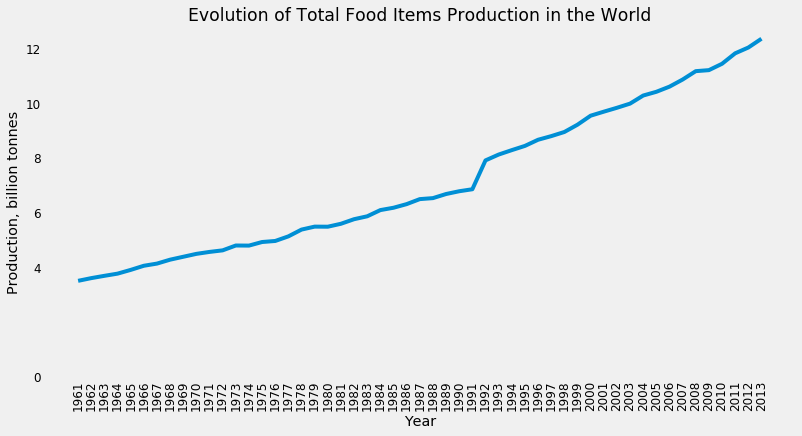

In [15]:
# grouping the DataFrame by year 
yearly_prod = melted_df.groupby("year", as_index=False).agg({"production":"sum"})

# plotting
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 12})

_ = sns.lineplot(x="year", y="production", data=yearly_prod)

plt.title("Evolution of Total Food Items Production in the World")
plt.xlabel("Year")
plt.ylabel("Production, billion tonnes")
plt.yticks([0, 4000000, 6000000, 8000000, 10000000, 12000000], ["0", "4", "6", "8", "10", "12"])
plt.xticks(rotation=90)
plt.grid(b=None)
plt.show()

Wow, what a growth! We've more than doubled our total food production since 1961. Have both food and feed items been growing this much?

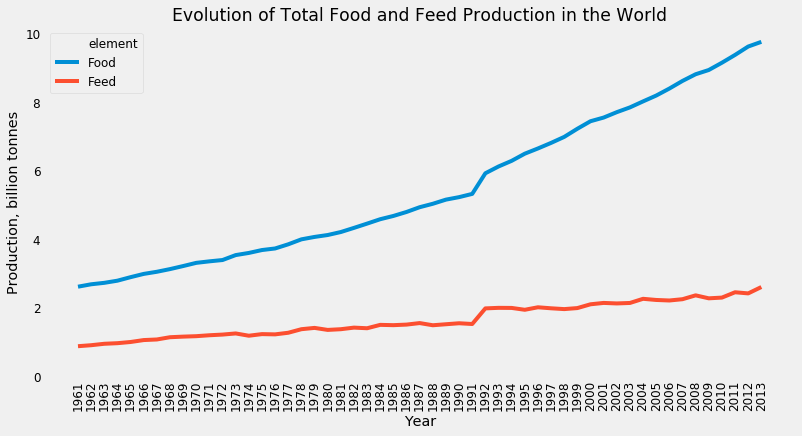

In [14]:
# creating a grouped DataFrame but this time with an 'element' column
yearly_prod_element = melted_df.groupby(["year", "element"], as_index=False).agg({"production":"sum"})

# plotting
plt.figure(figsize=(12,6))

_ = sns.lineplot(x="year", y="production", hue="element", data=yearly_prod_element, hue_order=["Food", "Feed"])

plt.title("Evolution of Total Food and Feed Production in the World")
plt.xlabel("Year")
plt.ylabel("Production, billion tonnes")
plt.yticks([0, 2000000, 4000000, 6000000, 8000000, 10000000], ["0", "2", "4", "6", "8", "10"])
plt.xticks(rotation=90)
plt.grid(b=None)
plt.show()

Both food and feed items have been growing indeed. Now, where has that spike in 1992 come from? We know that a number of countries "were born" around this time: they broke out from the USSR. Thus, the sudden growth could be related to this historical event. However, if there was data under USSR prior to 1991, this hypothesis would not hold. Let's run a couple of checks.

In [16]:
def df_filter(df, column, value):
    """a quick function that filters a data frame based on the values in one of its columns"""
    filtered_df = df[df[column]==value]
    return filtered_df

In [17]:
# checking if there is data under USSR
ussr = df_filter(melted_df, "area", "USSR")
ussr.shape

(0, 5)

In [19]:
# checking if there was any data under Russian Federation (instead of the USSR name) prior to 1991
russia = df_filter(melted_df, "area", "Russian Federation")
russia_1989 = df_filter(russia, "year", "1989")
russia_1992 = df_filter(russia, "year", "1992")
print(russia["production"].values[:4], russia_1989["production"].values[:4], russia_1992["production"].values[:4])

[nan nan nan nan] [nan nan nan nan] [34680. 19217.  1055. 20320.]


It looks like USSR was excluded until its collapse in 1991 and data under Russian Federation appears as of 1992. Could it be that USSR countries were included separately from 1961 to 1991? Let's check an example - Poland.

In [23]:
poland = df_filter(melted_df, "area", "Poland")
print(df_filter(poland, "year", "1970").iloc[0, -1])
print(df_filter(poland, "year", "1992").iloc[0, -1])

1759.0
3543.0


Food data was included for Poland as a separate country even when it was still part of the USSR. How about one of the smaller countries, for example, Latvia?

In [24]:
latvia = df_filter(melted_df, "area", "Latvia")
print(df_filter(latvia, "year", "1970").iloc[0, -1])
print(df_filter(latvia, "year", "1992").iloc[0, -1])

nan
26.0


After running these quick checks, we already see that data prior to 1992 was missing for some USSR countries. It must have been complicated to gather the data due to the difficult socio-economic climate. This creates some gaps in our dataset that were corrected for in 1992.

## Which countries are the biggest food producers?

We want to see which countries have produced the most food since 1961. We'll go with a top 5.

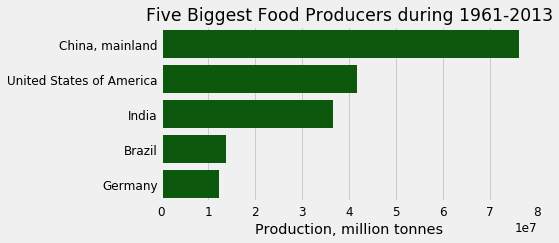

In [72]:
# creating a by-country DataFrame and taking the top 5 countries
yearly_prod_country = melted_df.groupby("area", as_index=False).agg({"production":"sum"}).sort_values(by="production", ascending=False)
yearly_prod_country_top5 = yearly_prod_country.head(5)

# plotting
plt.figure(figsize=(6,3))

_ = sns.barplot(x="production", y="area", data=yearly_prod_country_top5, color="darkgreen")

plt.title("Five Biggest Food Producers during 1961-2013")
plt.ylabel("")
plt.xlabel("Production, million tonnes")
plt.grid(b=None, which="minor")

plt.show()

The top five includes China, the US, India, Brazil and Germany. We're also interested in the yearly evolution of their total food production.

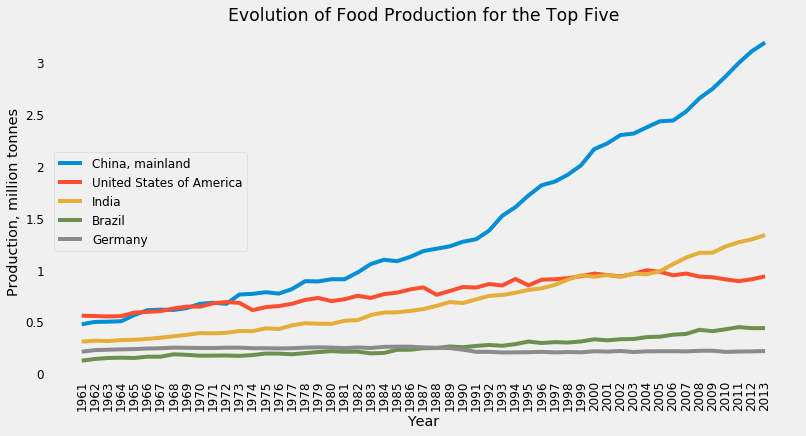

In [32]:
# creating a list of top 5 countries
top5_names = ["China, mainland", "United States of America", "India", "Brazil", "Germany"]
top5_var = []

# looping over them to create 5 filtered DataFrames
for country in top5_names:
    country_var = df_filter(melted_df, "area", country).groupby(["area", "year"], as_index=False).agg({"production":"sum"})
    top5_var.append(country_var)
    
# plotting    
plt.figure(figsize=(12,6))

for country in top5_var:
    sns.lineplot(x="year", y="production", data=country, label=country.iloc[0, 0])

plt.legend(loc="center left")
plt.title("Evolution of Food Production for the Top Five")
plt.xlabel("Year")
plt.ylabel("Production, million tonnes")
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000], ["0", "0.5", "1", "1.5", "2", "2.5", "3"])
plt.xticks(rotation=90)
plt.grid(b=None)

plt.show()

China's production growth from 1991 is much more rapid than what we observe for the other four countries. Suprisingly, the US total production started declining in 2004 and then picked up some growth in 2012.

## Is food production growth in China related to its population growth?

While it's interesting to see how food production evolved around the world, is this growth trend correlated with population growth? To explore this question, we've downloaded population data from the FAOSTAT website. We'll look into China as an example.

In [33]:
# reading the dataset and doing some cleaning
pop_df = pd.read_csv("FAO_population.csv", encoding="latin1")
pop_df.shape

(11352, 8)

In [34]:
pop_df.columns

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value', 'Note'], dtype='object')

In [35]:
# cleaning up column names
pop_df.columns = [column.lower() for column in pop_df.columns]
pop_df = pop_df.loc[:, ["area", "year", "value"]]
pop_df.columns = ["area", "year", "population"]
pop_df.head(2)

,area,year,population
0,Afghanistan,1961,9166.764
1,Afghanistan,1962,9345.868


In [36]:
pop_df.dtypes

area           object
year            int64
population    float64
dtype: object

In [37]:
# transforming the year column into string format to be in line with melted_df
pop_df["year"] = pop_df["year"].astype(str)

In [39]:
# creating a series of values for China's food production and population
# checking if they have the same shape
china_prod = top5_var[0]["production"]
china_pop = df_filter(pop_df, "area", "China, mainland")["population"]
print(china_prod.shape, china_pop.shape)

(53,) (53,)


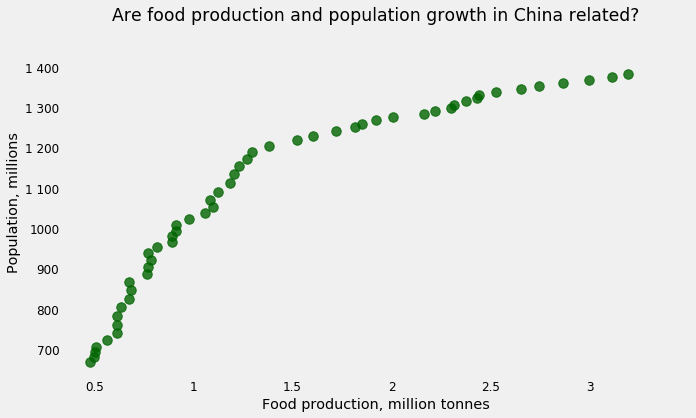

In [77]:
# plotting the relationship between food production and population growth
plt.figure(figsize=(10,6))

_ = sns.regplot(china_prod, china_pop, color="darkgreen", scatter_kws={"s": 90}, fit_reg=False)

plt.title("Are food production and population growth in China related?")
plt.xlabel("Food production, million tonnes")
plt.ylabel("Population, millions")
plt.xticks([500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000], ["0.5", "1", "1.5", "2", "2.5", "3", ""])
plt.yticks([700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000], ["700", "800", "900", "1000", "1 100", "1 200", "1 300", "1 400", ""])
plt.grid(b=None)

The scatter plot shows a linear relationship between the two variables. Let's also quickly calculate the correlation between the two.

In [73]:
corr_china = np.corrcoef(china_prod, china_pop)
print("The correlation between China's food production and population figures: {}".format(round(corr_china[0,1],2)))

The correlation between China's food production and population figures: 0.92


## Which food items are most produced?

So far, we've only looked at overall food and feed production. Let's now explore the top 10 most produced food and feed items.

In [141]:
# creating a grouped DataFrame on item and element
by_item_df = melted_df.groupby(["item", "element"], as_index=False).agg({"production":"sum"}).sort_values(by="production", ascending=False)

# creating a DataFrame for food element only, extracting the top 10
by_item_df_food = df_filter(by_item_df, "element", "Food")
top10_food_items= by_item_df_food.iloc[:9, :]

# creating a DataFrame for feed element only, extracting the top 10
by_item_df_feed = df_filter(by_item_df, "element", "Feed")
top10_feed_items = by_item_df_feed.iloc[:9, :]

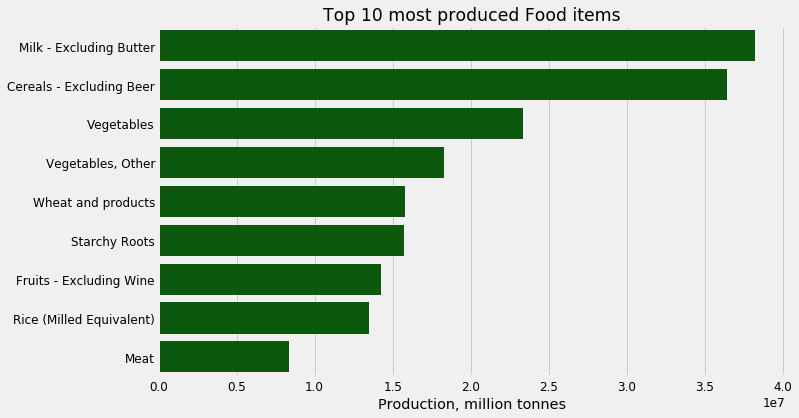

In [142]:
# plotting the top 10 food items
figure = plt.figure(figsize=(10,6))

_ = sns.barplot(x="production", y="item", data=top10_food_items, color="darkgreen")

plt.title("Top 10 most produced Food items")
plt.ylabel("")
plt.xlabel("Production, million tonnes")
plt.grid(b=None, which="minor")

plt.show()

Milk products and cereals are at the top of the list. Vegetables take positions #3 and #4. And meat is only #10!

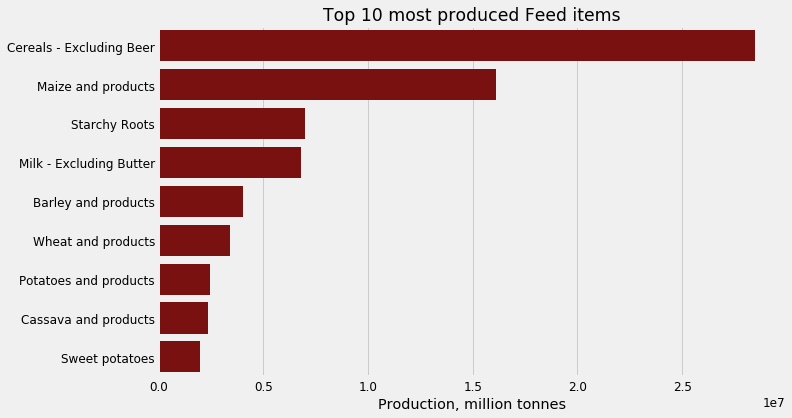

In [143]:
# plotting the top 10 feed items
figure = plt.figure(figsize=(10,6))

_ = sns.barplot(x="production", y="item", data=top10_feed_items, color="darkred")

plt.title("Top 10 most produced Feed items")
plt.ylabel("")
plt.xlabel("Production, million tonnes")
plt.grid(b=None, which="minor")

plt.show()

Cereals, maize and starchy roots are what we feed to lievstock and poultry the most. No surprises here.

## Final note

We've explored a dataset that captures total food and feed available in a given country from 1961 to 2013. We've discovered a substantial growth in world food production during this period of time, especially in China. It seems to be in line with population growth. We mainly produce milk items, cereals and vegetables.